# Clear Day Detection

This notebook illustrates how the `DataHandler` class automatically segments PV power data in to "clear" days and "cloudy" days. The algorithm estimates the clear days in a data set two ways and then combines the estimates for the final estimations. The first estimate is based on the "smoothness" of each daily power signal. The second estimate is based on the seasonally adjusted daily energy output of the system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from solardatatools import DataHandler, get_pvdaq_data

Use the supplied helper function to grab data from NREL's [PVDAQ](https://developer.nrel.gov/docs/solar/pvdaq-v3/) service.

In [2]:
df = get_pvdaq_data(sysid=35, api_key='DEMO_KEY', year=[2011, 2012, 2013])

In [11]:
df.head()

,SiteID,ac_current,ac_power,ac_voltage,ambient_temp,dc_current,dc_power,dc_voltage,inv1_ac_power,inverter_airtemp,inverter_error_code,inverter_temp,module_temp,poa_irradiance,power_factor,relative_humidity,wind_direction,wind_speed
2011-01-01 00:00:00,35.0,0.0,-200.0,284.0,-3.353332,-3.0,-200.0,18.0,NaN,NaN,0.0,25.0,-7.105555,0.0,0.0,53.513,315.270,0.483250
2011-01-01 00:15:00,35.0,0.0,-200.0,284.0,-3.381110,-4.0,-200.0,18.0,NaN,NaN,0.0,25.0,-6.944444,0.0,0.0,53.581,308.835,0.698724
2011-01-01 00:30:00,35.0,0.0,-300.0,284.0,-3.257777,-3.0,0.0,17.0,NaN,NaN,0.0,25.0,-6.344444,0.0,0.0,53.413,272.678,0.218156
2011-01-01 00:45:00,35.0,0.0,-300.0,284.0,-3.296666,-3.0,-200.0,17.0,NaN,NaN,0.0,24.0,-6.655555,0.0,0.0,52.406,55.913,0.159146
2011-01-01 01:00:00,35.0,0.0,-300.0,284.0,-3.426110,-3.0,-200.0,16.0,NaN,NaN,0.0,24.0,-7.405555,0.0,0.0,53.588,152.145,0.240508


Pass the tabular data in the data frame to the `DataHandler` object instance, and run the pipeline on the desired column.

In [3]:
dh = DataHandler(df)

In [4]:
dh.keys

['SiteID',
 'ac_current',
 'ac_power',
 'ac_voltage',
 'ambient_temp',
 'dc_current',
 'dc_power',
 'dc_voltage',
 'inv1_ac_power',
 'inverter_airtemp',
 'inverter_error_code',
 'inverter_temp',
 'module_temp',
 'poa_irradiance',
 'power_factor',
 'relative_humidity',
 'wind_direction',
 'wind_speed']

In [5]:
dh.run_pipeline(power_col='dc_power')

total time: 2.12 seconds
form matrix: 0.05, fill matrix: 0.12, daily scores: 0.18, 
daily flags: 0.02, clear detect: 0.19, clipping check: 0.20, 
data scoring: 0.83, fix time shifts: 0.53,


The standard pipeline include the clear day detection. We can inspect the results using supplied plotting functions. Here we look at the total daily energy and mark the days that are identified as clear.

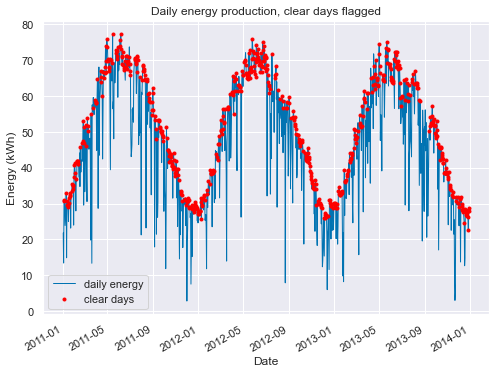

In [10]:
dh.plot_daily_energy(flag='clear')
plt.legend(['daily energy', 'clear days']);

We use a boolean index to mark the clear days. Each `True` entry corresponds with a day that is detected as clear. You can access it as an attribute under `daily_flags`:

In [12]:
dh.daily_flags.clear

array([False, False,  True, ...,  True,  True,  True])